# Word2Vec für übersetzte Daten



Dieses Notebook erstellt die Word Embeddings für die nicht übersetzten Daten.
Schlussendlich werden die umgewandelten Dateneinträge in einem DataFrame gespeichert.

In [2]:
import os
import pandas as pd
import numpy as np
import nltk
import re
import gensim.models.word2vec as w2v
import spacy
import multiprocessing
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [1]:
PATH = 'data/EN/'

In [3]:
df_train = pd.read_csv(os.path.join(PATH, 'nlp_train_en.csv'))
df_val = pd.read_csv(os.path.join(PATH, 'nlp_valid_en.csv'))
df_test = pd.read_csv(os.path.join(PATH, 'nlp_test_en.csv'))

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Wir laden den Tokenizer und den Lemmatizer ins Notebook

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def sentence_to_wordlist(text):
    sentence = nlp(text)
    output = []
    for word in sentence:
      output.append(lemmatizer.lemmatize(word.text))
    return output

In [ ]:
#Testen der Funktion
print(df_train.premise_EN[0])
print(sentence_to_wordlist(df_train.premise_EN[0]))

and these comments were considered in formulating the interim rules.
['and', 'these', 'comment', 'were', 'considered', 'in', 'formulating', 'the', 'interim', 'rule', '.']


In [ ]:
#Wir fügen alle Prämissen und Hypothesen in einen Corpus zusammen

In [ ]:
sentences = df_train.premise_EN.values.tolist()
sentences.extend(df_train.hypothesis_EN.values.tolist())
sentences.extend(df_val.premise_EN.values.tolist())
sentences.extend(df_val.hypothesis_EN.values.tolist())
sentences.extend(df_test.premise_EN.values.tolist())
sentences.extend(df_test.hypothesis_EN.values.tolist())

In [ ]:
len(sentences)

34630

In [ ]:
sentences[:10]

['and these comments were considered in formulating the interim rules.',
 'These are issues that we wrestle with in practice groups of law firms, she said. ',
 'Small things like that make a huge difference in what I try to do.',
 "you know they can't really defend themselves like somebody grown uh say my age you know yeah",
 'So in role-play, the ability to express and play multiple roles at the same time can help children identify similarities and differences between people in terms of desires, beliefs and feelings.',
 'You can hear someone on a farm saying that we have to cut off the nests that are shut down by the network, which probably means, separate those that are going to be loaded.',
 "On the U.S. State Department's return, this FBI agent met at the airport through agents, investigated, and the next day met with the Federal Green Guard before investigating Saddam Hussein.",
 "From Cockpit Country to St. Ann's Bay",
 "Look, it's your skin, but you're going to be in trouble if 

In [ ]:
corpus = []
for sentence in sentences:
  corpus.append(sentence_to_wordlist(sentence))

In [ ]:
token_count = sum([len(sentence) for sentence in corpus])
print('Unser Corpus enthält:', token_count,  'tokens')

Unser Corpus enthält: 580557 tokens


In [ ]:
#In einem Vergleich haben wir das Embedding mit einem vortrainierten Word2Vec ausprobiert. Dann kann man das Training üerspringen
#nlp2vec = api.load("glove-wiki-gigaword-300")

Training

In [ ]:
#Nun können wir das W2V trainieren. Weiter unten kann man jedoch auch unsere bereits erstellten W2V einlesen

In [ ]:
nlp2vec = w2v.Word2Vec(
    sg=1,
    seed=1,
    workers=multiprocessing.cpu_count(),
    size=300,
    min_count=3,
    window=10,
    sample=1e-3
)

In [ ]:
nlp2vec.build_vocab(corpus)

In [ ]:
print("Word2Vec Vokabular:", len(nlp2vec.wv.vocab))

Word2Vec Vokabular: 13926


In [ ]:
#train model on sentneces
nlp2vec.train(corpus, total_examples=nlp2vec.corpus_count, epochs=50)

(20901968, 29027850)

In [ ]:
#Das Word2Vec wird gespeichert
#nlp2vec.save('W2V/nlp2vec_own_en.w2v')

In [ ]:
len(nlp2vec.wv['computer'])

300

In [ ]:
vocab = nlp2vec.wv.vocab.keys()

In [ ]:
len(vocab)

13926

Umwandeln der Sequenzen

In [ ]:
#Nun tokenizen wir alle Prämissen/Hypothesen, wandeln jedes Wort in einen Vektor um und speichern die Sequenz als Liste

In [ ]:
train_premises_embedded = []
for sentence in df_train.premise_EN.values:
  train_premises_embedded.append(sentence_to_wordlist(sentence))

In [ ]:
X_train_premises = []
for sentences in train_premises_embedded:
  sentence = []
  for i in sentences:
    if i in vocab:
      sentence.append(nlp2vec.wv[i])
  X_train_premises.append(np.array(sentence))

In [ ]:
train_hypothesis_embedded = []
for sentence in df_train.hypothesis_EN.values:
  train_hypothesis_embedded.append(sentence_to_wordlist(sentence))

In [ ]:
X_train_hypothesis = []
for sentences in train_hypothesis_embedded:
  sentence = []
  for i in sentences:
    if i in vocab:
      sentence.append(nlp2vec.wv[i])
  X_train_hypothesis.append(np.array(sentence))

In [ ]:
val_premises_embedded = []
for sentence in df_val.premise_EN.values:
  val_premises_embedded.append(sentence_to_wordlist(sentence))

In [ ]:
X_val_premises = []
for sentences in val_premises_embedded:
  sentence = []
  for i in sentences:
    if i in vocab:
      sentence.append(nlp2vec.wv[i])
  X_val_premises.append(np.array(sentence))

In [ ]:
val_hypothesis_embedded = []
for sentence in df_val.hypothesis_EN.values:
  val_hypothesis_embedded.append(sentence_to_wordlist(sentence))

In [ ]:
X_val_hypothesis = []
for sentences in val_hypothesis_embedded:
  sentence = []
  for i in sentences:
    if i in vocab:
      sentence.append(nlp2vec.wv[i])
  X_val_hypothesis.append(np.array(sentence))

In [ ]:
test_premises_embedded = []
for sentence in df_test.premise_EN.values:
  test_premises_embedded.append(sentence_to_wordlist(sentence))

In [ ]:
X_test_premises = []
for sentences in test_premises_embedded:
  sentence = []
  for i in sentences:
    if i in vocab:
      sentence.append(nlp2vec.wv[i])
  X_test_premises.append(np.array(sentence))

In [ ]:
test_hypothesis_embedded = []
for sentence in df_test.hypothesis_EN.values:
  test_hypothesis_embedded.append(sentence_to_wordlist(sentence))

In [ ]:
X_test_hypothesis = []
for sentences in test_hypothesis_embedded:
  sentence = []
  for i in sentences:
    if i in vocab:
      sentence.append(nlp2vec.wv[i])
  X_test_hypothesis.append(np.array(sentence))

In [ ]:
#Wir generieren ein NP-Array aus den Listen

In [ ]:
X_train_premises_vect = np.array(X_train_premises)
X_val_premises_vect = np.array(X_val_premises)
X_test_premises_vect = np.array(X_test_premises)
X_train_hypothesis_vect = np.array(X_train_hypothesis)
X_val_hypothesis_vect = np.array(X_val_hypothesis)
X_test_hypothesis_vect = np.array(X_test_hypothesis)

<ipython-input-56-d1fe6137ce57>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_premises_vect = np.array(X_train_premises)
<ipython-input-56-d1fe6137ce57>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_val_premises_vect = np.array(X_val_premises)
<ipython-input-56-d1fe6137ce57>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndar

In [ ]:
X_train_premises_vect.shape

(10908,)

In [ ]:
#Auch die Labels speichern wir

In [ ]:
y_train = df_train.label.values
y_val = df_val.label.values

In [ ]:
#Wir fassen die Arrays in einem DataFrame zusammen, welches wir dann abspeichern

In [ ]:
X_train = pd.DataFrame(columns=["premises", "hypothesis"])
for premise, hypothesis in zip(X_train_premises_vect, X_train_hypothesis_vect):
  X_train = X_train.append({'premises':premise, 'hypothesis':hypothesis}, ignore_index=True)

In [ ]:
X_val = pd.DataFrame(columns=["premises", "hypothesis"])
for premise, hypothesis in zip(X_val_premises_vect, X_val_hypothesis_vect):
  X_val = X_val.append({'premises':premise, 'hypothesis':hypothesis}, ignore_index=True)

In [ ]:
X_test = pd.DataFrame(columns=["premises", "hypothesis"])
for premise, hypothesis in zip(X_test_premises_vect, X_test_hypothesis_vect):
  X_test = X_test.append({'premises':premise, 'hypothesis':hypothesis}, ignore_index=True)

In [ ]:
X_train.to_pickle('data_lstm/en/X_train.pkl')
X_val.to_pickle('data_lstm/en/X_val.pkl')
X_test.to_pickle('data_lstm/en/X_test.pkl')

In [ ]:
np.save('data_lstm/en/y_train.npy', y_train, allow_pickle=True)
np.save('data_lstm/en/y_val.npy', y_val, allow_pickle=True)


In [ ]:
X_train.head()

,premises,hypothesis
0,"[[-0.008151069, -0.30738294, -0.026232932, 0.1...","[[0.3665531, -0.21156085, 0.09610897, 0.172592..."
1,"[[-0.1675249, -0.061697148, 0.17363028, 0.1501...","[[-0.036666308, -0.4520832, 0.0814072, 0.22276..."
2,"[[-0.008923122, -0.13714948, 0.47105202, -0.25...","[[0.2508015, -0.31566736, -0.13040107, -0.2917..."
3,"[[0.03973053, -0.27166423, 0.057587396, 0.0040...","[[0.3032564, -0.19203757, 0.5615059, -0.056407..."
4,"[[-0.32373026, 0.06505607, 0.20701812, 0.13545...","[[0.11205806, -0.16392073, -0.055686492, 0.201..."


Checkpoints

In [4]:
#Laden des WordEmbeddings ohne Übersetzung
nlp2vec = w2v.Word2Vec.load('W2V/nlp2vec_own.w2v')

In [ ]:
#Laden des WordEmbeddings mit Übersetzung
#nlp2vec = w2v.Word2Vec.load('W2V/nlp2vec_own_en.w2v')

Analyse

In [ ]:
import tqdm

In [ ]:
min = 1
max = 0
max_words = ()
min_words = ()
for i in tqdm.tqdm(vocab):
  for j in vocab:
    if i != j:
      sim = nlp2vec.wv.similarity(i, j)
      if sim > max:
        max_words = (i, j)
        max = sim
      elif sim < min:
        min_words = (i, j)
        min = sim

100%|██████████| 13926/13926 [1:08:26<00:00,  3.39it/s]


In [ ]:
print(max_words)
print(max)
print(min_words)
print(min)

('chaprasi', 'dakoit')
0.9960604
('need', 'Recommendations')
-0.18703337


In [ ]:
#Wir müssen die Sätze nochmals ausführen

In [ ]:
sentences = df_train.premise_EN.values.tolist()
sentences.extend(df_train.hypothesis_EN.values.tolist())
sentences.extend(df_val.premise_EN.values.tolist())
sentences.extend(df_val.hypothesis_EN.values.tolist())
sentences.extend(df_test.premise_EN.values.tolist())
sentences.extend(df_test.hypothesis_EN.values.tolist())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sentences).todense()
vectorizer.get_feature_names_out()

array(['00', '000', '01', ..., 'ähm', 'ör', 'υrt'], dtype=object)

In [ ]:
X_tfidf.shape

(34630, 21132)

In [ ]:
vectorizer.get_feature_names_out().shape

(21132,)

In [ ]:
index = ['satz {:d}'.format(i) for i in range(34630)]

In [ ]:
df_tfidf = pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names(), index=index).T

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Schauen wir, wann die Wörter auftauchen und wie hoch der tdidf Wert dort ist

In [ ]:
#Grösster tfidf Unterschied: Kommen oft vor

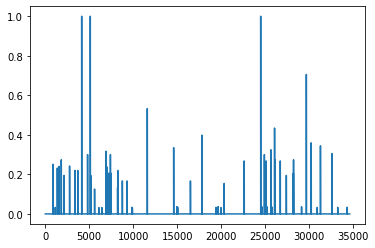

In [ ]:
plt.plot(df_tfidf.loc['recommendations'].values)
plt.show()

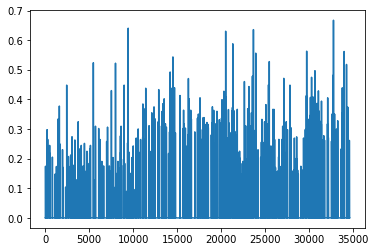

In [ ]:
plt.plot(df_tfidf.loc['need'].values)
plt.show()

In [ ]:
#Kleinster tfidf Unterschied: Kommen zusammen und selten vor

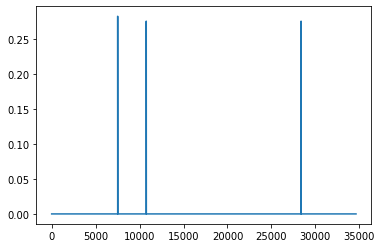

In [ ]:
plt.plot(df_tfidf.loc['chaprasi'].values)
plt.show()

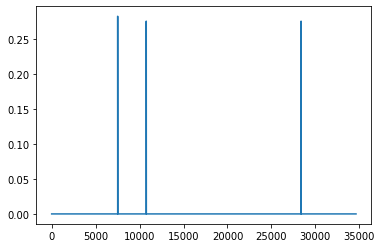

In [ ]:
plt.plot(df_tfidf.loc['dakoit'].values)
plt.show()

In [ ]:
np.argmax(df_tfidf.max().values)

175

In [ ]:
df_train.premise[175]

'Bauerstein."'

In [5]:
#Die Prämisse besteht lediglich aus einem Wort

In [ ]:
sentences[175]

'Bauerstein."'

In [ ]:
min(df_tfidf.min())

0.0